In [2]:
import random, math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
#import simpy
import scipy.optimize as op
import time
import pymc3 as pm 
import pandas as pd
import theano.tensor as tt
import seaborn as sb

/Users/tortysivill/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
A = [80.71, 82.45, 83.37, 82.13, 81.21,82.87,84.08,82.00,79.98,82.44,83.55,82.18,78.95,81.58,82.68,79.39,77.33,81.81,83.11,78.95,79.62,78.63,82.68,80.83,79.85,80.90,79.17,79.5,79.54,80.18,81,80.33]
B = [75.05, 75.31, 75.29, 74.83, 75.44, 75.64, 75.75, 75.37, 75.07, 75, 75.01, 74.93, 74.90, 75.60, 76.1, 75.1, 74.01, 76.8, 77.41, 73.25, 76.15, 77.27, 77.5, 76.67, 74.62, 72.09, 73.0, 73.1, 76.92, 74.18, 72.2, 72]
C = [80.25, 81.67, 82.59, 80.89, 80.47, 82.4, 83.71, 80.09, 79.38, 81.81, 82.69, 81.47, 79.45, 81.1, 82.46, 80.71, 76.52, 81.1, 81.36, 78.95, 79.61, 77.72, 82.5, 81.25, 80.31, 81.81, 78.33, 80.5, 81.08, 78.18, 81.33, 81]
D = [64.26, 61.51, 63.72, 62.27, 64.60, 61.25, 64.16, 61.97, 64.66, 60.66, 64.08, 61.86, 65.38, 59.93, 64.91, 60.86, 64.98, 60.53, 66.23, 59.65, 66.54, 59.55, 67.08, 59.58, 61.54, 67.27, 68.33, 60, 64.62, 72.73, 71.67, 60]

X = [42.46, 40.94, 58.39, 56.92, 65.94, 67.28, 68.79, 68.44, 64.24, 68.48] 

In [4]:
print(A)

[80.71, 82.45, 83.37, 82.13, 81.21, 82.87, 84.08, 82.0, 79.98, 82.44, 83.55, 82.18, 78.95, 81.58, 82.68, 79.39, 77.33, 81.81, 83.11, 78.95, 79.62, 78.63, 82.68, 80.83, 79.85, 80.9, 79.17, 79.5, 79.54, 80.18, 81, 80.33]


In [5]:
A_accuracy = A
A_partition = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
A_samples = [201,201,201,201,156,156,156,156,116,116,116,116,76,76,76,76,38,38,38,38,20,20,20,20,10,10,10,10,5,5,5,5]
A_groupi = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

A_group = []
B_group = []
D_group = []
C_group = []

for i in A_groupi:
    A_group.append('Hierarchical Model')
    B_group.append('Benchmark 1')
    D_group.append('Benchmark 2')
    C_group.append('MAP Estimate')



C_accuracy = C
C_partition = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
C_samples = [201,201,201,201,156,156,156,156,116,116,116,116,76,76,76,76,38,38,38,38,20,20,20,20,10,10,10,10,5,5,5,5]


B_accuracy = B
B_partition = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
B_samples = [201,201,201,201,156,156,156,156,116,116,116,116,76,76,76,76,38,38,38,38,20,20,20,20,10,10,10,10,5,5,5,5]

D_accuracy = D
D_partition = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
D_samples = [201,201,201,201,156,156,156,156,116,116,116,116,76,76,76,76,38,38,38,38,20,20,20,20,10,10,10,10,5,5,5,5]

accuracies = np.asarray([A,B,D])
accuracies_new = accuracies.reshape(96,1)

partitions = np.asarray([A_partition, B_partition, D_partition])
partitions_new = partitions.reshape(96,1)

groups = np.asarray([A_group, B_group, D_group])
groups_new = groups.reshape(96,1)

samples = np.asarray([A_samples, B_samples, D_samples])
samples_new = samples.reshape(96,1)

data = np.asarray([groups, partitions, samples, accuracies], dtype=object)
n_data = data.transpose()
new_data = n_data.reshape(96,4)


l = ["groups", "partitions", "samples", "accuracies"]

df = pd.DataFrame(new_data, columns = l)


print(df)




                groups partitions samples accuracies
0   Hierarchical Model          1     201      80.71
1          Benchmark 1          1     201      75.05
2          Benchmark 2          1     201      64.26
3   Hierarchical Model          2     201      82.45
4          Benchmark 1          2     201      75.31
5          Benchmark 2          2     201      61.51
6   Hierarchical Model          3     201      83.37
7          Benchmark 1          3     201      75.29
8          Benchmark 2          3     201      63.72
9   Hierarchical Model          4     201      82.13
10         Benchmark 1          4     201      74.83
11         Benchmark 2          4     201      62.27
12  Hierarchical Model          1     156      81.21
13         Benchmark 1          1     156      75.44
14         Benchmark 2          1     156       64.6
15  Hierarchical Model          2     156      82.87
16         Benchmark 1          2     156      75.64
17         Benchmark 2          2     156     

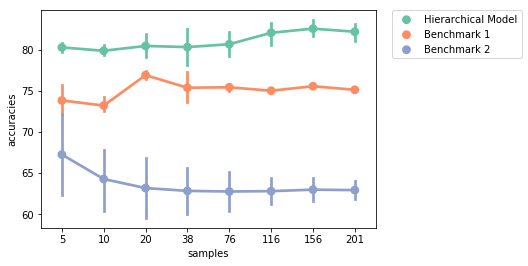

In [6]:
ax = sb.pointplot(x="samples", y="accuracies", hue="groups", data=df, palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

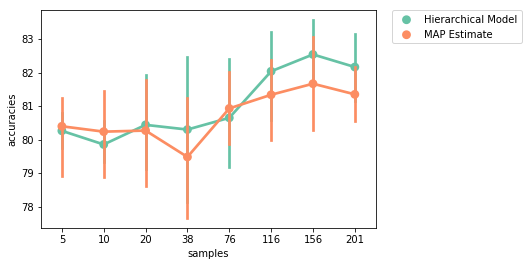

In [7]:
accuracies2 = np.asarray([A,C])
accuracies2_new = accuracies2.reshape(64,1)

partitions2 = np.asarray([A_partition, C_partition])
partitions2_new = partitions2.reshape(64,1)

groups2 = np.asarray([A_group, C_group])
groups_new2 = groups2.reshape(64,1)

samples2 = np.asarray([A_samples, C_samples])
samples_new2 = samples2.reshape(64,1)

data2 = np.asarray([groups2, partitions2, samples2, accuracies2], dtype=object)
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(64,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df2 = pd.DataFrame(new_data2, columns = l_2)

ax = sb.pointplot(x="samples", y="accuracies", hue="groups", data=df2, palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

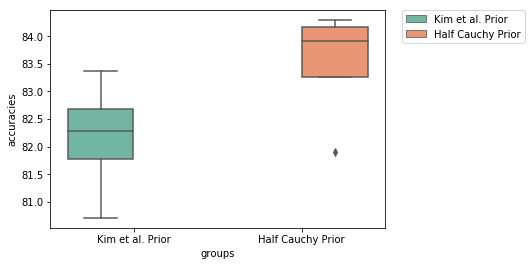

In [8]:
A = [80.71, 82.45, 83.37, 82.13]
B = [81.90, 83.72, 84.29, 84.12]

A_accuracy = A
A_partition = [1,2,3,4]
A_samples = [201, 201, 201, 201]
A_group = [0,0,0,0]

B_accuracy = B
B_partition = [1,2,3,4]
B_samples = [201, 201, 201, 201]
B_group = [1,1,1,1]


accuracies2 = np.asarray([A,B])
accuracies2_new = accuracies2.reshape(8,1)

partitions2 = np.asarray([A_partition, B_partition])
partitions2_new = partitions2.reshape(8,1)

groups2 = np.asarray([A_group, B_group])
groups_new2 = groups2.reshape(8,1)

samples2 = np.asarray([A_samples, B_samples])
samples_new2 = samples2.reshape(8,1)



data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(8,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df2 = pd.DataFrame(new_data2, columns = l_2)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df2, palette="Set2")
ax.set_xticklabels(['Kim et al. Prior', 'Half Cauchy Prior'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Kim et al. Prior', 'Half Cauchy Prior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

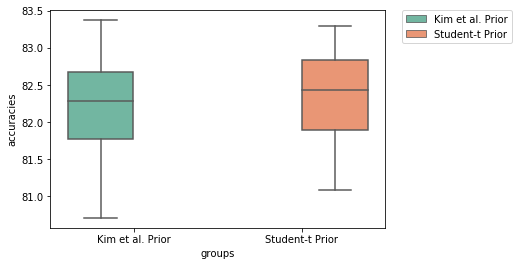

In [9]:
C = [81.08, 82.68, 83.29, 82.17]



C_accuracy = C
C_partition = [1,2,3,4]
C_samples = [201, 201, 201, 201]
C_group = [3,3,3,3]
accuracies2 = np.asarray([A,C])
accuracies2_new = accuracies2.reshape(8,1)

partitions2 = np.asarray([A_partition, C_partition])
partitions2_new = partitions2.reshape(8,1)

groups2 = np.asarray([A_group, C_group])
groups_new2 = groups2.reshape(8,1)

samples2 = np.asarray([A_samples, C_samples])
samples_new2 = samples2.reshape(8,1)



data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(8,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df2 = pd.DataFrame(new_data2, columns = l_2)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df2, palette = "Set2")
ax.set_xticklabels(['Kim et al. Prior', 'Student-t Prior'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Kim et al. Prior', 'Student-t Prior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

    groups  partitions  samples  accuracies
0      0.0         1.0    201.0       80.71
1      1.0         1.0    201.0       81.90
2      3.0         1.0    201.0       81.08
3      4.0         1.0    201.0       82.43
4      0.0         2.0    201.0       82.45
5      1.0         2.0    201.0       83.72
6      3.0         2.0    201.0       82.68
7      4.0         2.0    201.0       83.94
8      0.0         3.0    201.0       83.37
9      1.0         3.0    201.0       84.29
10     3.0         3.0    201.0       83.29
11     4.0         3.0    201.0       84.50
12     0.0         4.0    201.0       82.13
13     1.0         4.0    201.0       84.12
14     3.0         4.0    201.0       82.17
15     4.0         4.0    201.0       83.72


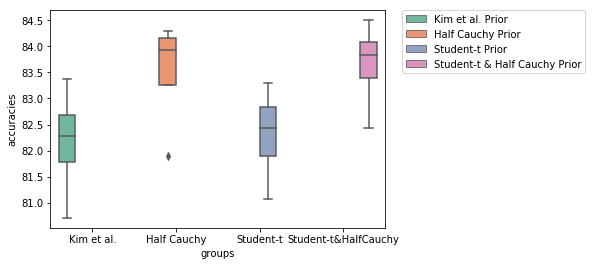

In [10]:
D = [82.43, 83.94, 84.5, 83.72]

D_accuracy = D
D_partition = [1,2,3,4]
D_samples = [201, 201, 201, 201]
#D_group = ["T & half Cauchy", "T & half Cauchy", "T & half Cauchy", "T & half Cauchy"]
D_group = [4,4,4,4]

accuracies2 = np.asarray([A,B,C,D])
accuracies2_new = accuracies2.reshape(16,1)

partitions2 = np.asarray([A_partition, B_partition, C_partition, D_partition])
partitions2_new = partitions2.reshape(16,1)

groups2 = np.asarray([A_group, B_group, C_group, D_group])
groups_new2 = groups2.reshape(16,1)

samples2 = np.asarray([A_samples, B_samples, C_samples, D_samples])
samples_new2 = samples2.reshape(16,1)



data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(16,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df3, palette="Set2")
ax.set_xticklabels(['Kim et al.', 'Half Cauchy', 'Student-t', 'Student-t&HalfCauchy'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], ['Kim et al. Prior', 'Half Cauchy Prior', 'Student-t Prior', 'Student-t & Half Cauchy Prior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



   groups  partitions  samples  accuracies
0     0.0         1.0    201.0       80.71
1     1.0         1.0    201.0       80.94
2     0.0         2.0    201.0       82.45
3     1.0         2.0    201.0       85.45
4     0.0         3.0    201.0       83.37
5     1.0         3.0    201.0       83.45
6     0.0         4.0    201.0       82.13
7     1.0         4.0    201.0       80.56


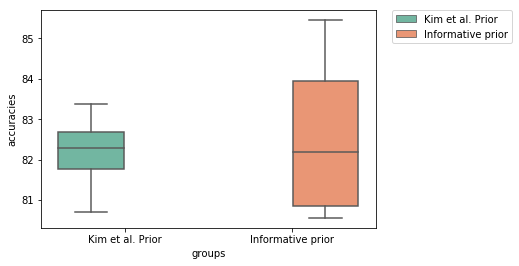

In [11]:
B = [80.94, 85.45, 83.45, 80.56]

B_accuracy = B
B_partition = [1,2,3,4]
B_samples = [201, 201, 201, 201]
B_group = [1,1,1,1]

accuracies2 = np.asarray([A,B])
accuracies2_new = accuracies2.reshape(8,1)

partitions2 = np.asarray([A_partition, B_partition])
partitions2_new = partitions2.reshape(8,1)

groups2 = np.asarray([A_group, B_group])
groups_new2 = groups2.reshape(8,1)

samples2 = np.asarray([A_samples, B_samples])
samples_new2 = samples2.reshape(8,1)



data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(8,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df3, palette="Set2")
ax.set_xticklabels(['Kim et al. Prior', 'Informative prior'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Kim et al. Prior', 'Informative prior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

    groups  partitions  samples  accuracies
0      0.0         1.0    201.0       80.71
1      2.0         1.0    201.0       81.17
2      3.0         1.0    201.0       80.48
3      0.0         2.0    201.0       82.45
4      2.0         2.0    201.0       83.04
5      3.0         2.0    201.0       82.54
6      0.0         3.0    201.0       83.37
7      2.0         3.0    201.0       83.67
8      3.0         3.0    201.0       83.21
9      0.0         4.0    201.0       82.13
10     2.0         4.0    201.0       82.42
11     3.0         4.0    201.0       81.84


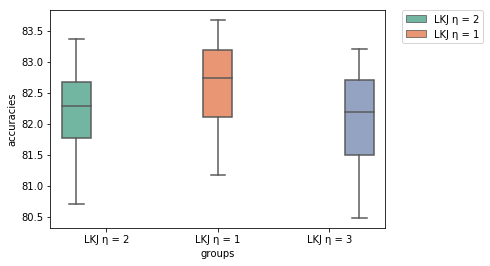

In [12]:
B = [81.17, 83.04, 83.67, 82.42]
C = [80.48, 82.54, 83.21, 81.84]

B_partition = [1,2,3,4]
B_samples = [201, 201, 201, 201]
B_group = [2,2,2,2]

C_partition = [1,2,3,4]
C_samples = [201, 201, 201, 201]
C_group = [3,3,3,3]

accuracies2 = np.asarray([A,B,C])
accuracies2_new = accuracies2.reshape(12,1)

partitions2 = np.asarray([A_partition, B_partition, C_partition])
partitions2_new = partitions2.reshape(12,1)

groups2 = np.asarray([A_group, B_group, C_group])
groups_new2 = groups2.reshape(12,1)

samples2 = np.asarray([A_samples, B_samples, C_samples])
samples_new2 = samples2.reshape(12,1)

data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(12,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df3, palette="Set2")
ax.set_xticklabels(['LKJ η = 2', 'LKJ η = 1', 'LKJ η = 3'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['LKJ η = 2', 'LKJ η = 1', 'LKJ η = 3'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



    groups  partitions  samples  accuracies
0      2.0         1.0    201.0       77.77
1      3.0         1.0    201.0       78.65
2      4.0         1.0    201.0       77.42
3      2.0         2.0    201.0       79.10
4      3.0         2.0    201.0       75.03
5      4.0         2.0    201.0       79.10
6      2.0         3.0    201.0       79.77
7      3.0         3.0    201.0       74.50
8      4.0         3.0    201.0       79.77
9      2.0         4.0    201.0       78.27
10     3.0         4.0    201.0       75.37
11     4.0         4.0    201.0       78.27


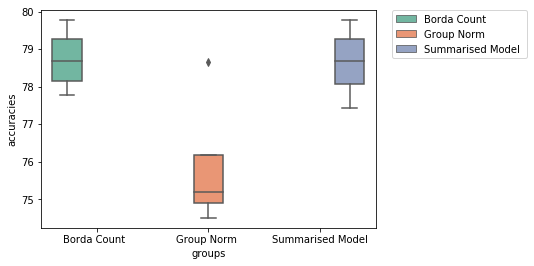

In [13]:
B = [77.77, 79.10, 79.77, 78.27]
C = [78.65, 75.03, 74.5, 75.37]
D = [77.42, 79.10, 79.77, 78.27]

B_partition = [1,2,3,4]
B_samples = [201, 201, 201, 201]
B_group = [2,2,2,2]

C_partition = [1,2,3,4]
C_samples = [201, 201, 201, 201]
C_group = [3,3,3,3]

D_partition = [1,2,3,4]
D_samples = [201, 201, 201, 201]
D_group = [4,4,4,4]

accuracies2 = np.asarray([B,C,D])
accuracies2_new = accuracies2.reshape(12,1)

partitions2 = np.asarray([B_partition, C_partition, D_partition])
partitions2_new = partitions2.reshape(12,1)

groups2 = np.asarray([B_group, C_group, D_group])
groups_new2 = groups2.reshape(12,1)

samples2 = np.asarray([B_samples, C_samples, D_samples])
samples_new2 = samples2.reshape(12,1)

data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(12,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df3, palette="Set2")
ax.set_xticklabels(['Borda Count  ', 'Group Norm ', 'Summarised Model'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Borda Count ', 'Group Norm ','Summarised Model '], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

   groups  partitions  samples  accuracies
0     2.0         1.0    201.0       91.54
1     3.0         1.0    201.0       91.92
2     2.0         2.0    201.0       86.98
3     3.0         2.0    201.0      100.00
4     2.0         3.0    201.0       92.29
5     3.0         3.0    201.0      100.00
6     2.0         4.0    201.0       91.91
7     3.0         4.0    201.0       95.85


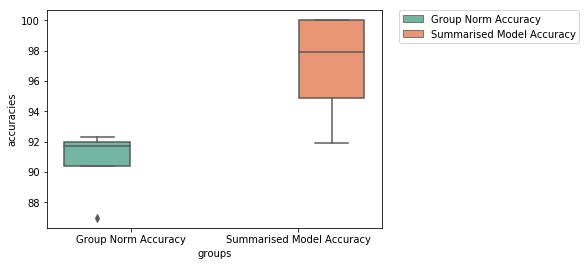

In [14]:
B = [91.54, 86.98, 92.29, 91.91]
C = [91.92, 100, 100, 95.85]

B_partition = [1,2,3,4]
B_samples = [201, 201, 201, 201]
B_group = [2,2,2,2]

C_partition = [1,2,3,4]
C_samples = [201, 201, 201, 201]
C_group = [3,3,3,3]

accuracies2 = np.asarray([B,C])
accuracies2_new = accuracies2.reshape(8,1)

partitions2 = np.asarray([B_partition, C_partition])
partitions2_new = partitions2.reshape(8,1)

groups2 = np.asarray([B_group, C_group])
groups_new2 = groups2.reshape(8,1)

samples2 = np.asarray([B_samples, C_samples])
samples_new2 = samples2.reshape(8,1)

data2 = np.asarray([groups2, partitions2, samples2, accuracies2])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(8,4)

l_2 = ["groups", "partitions", "samples", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.boxplot(x="groups", y="accuracies", hue="groups", data=df3, palette="Set2")
ax.set_xticklabels(['Group Norm Accuracy', 'Summarised Model Accuracy'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Group Norm Accuracy', 'Summarised Model Accuracy'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [15]:
A = np.asarray([80.71,82.51,83.37,82.13])
print(A.var())

0.9221000000000084


[42.46, 40.94, 58.39, 56.92, 65.94, 67.28, 68.79, 68.44, 64.24, 68.48]
   partitions  number of moral feature parameters  accuracies
0         1.0                                 1.0       42.46
1         2.0                                 1.0       40.94
2         1.0                                 3.0       58.39
3         2.0                                 3.0       56.92
4         1.0                                 5.0       65.94
5         2.0                                 5.0       67.28
6         1.0                                 7.0       68.79
7         2.0                                 7.0       68.44
8         1.0                                 9.0       64.24
9         2.0                                 9.0       68.48


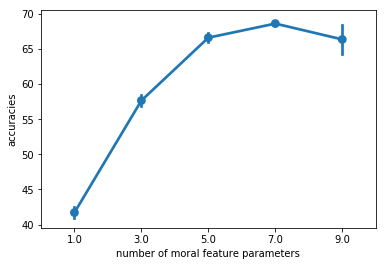

In [23]:
print(X)
X_partition = [1,2,1,2,1,2,1,2,1,2]
X_samples = [1, 1, 3, 3, 5, 5, 7, 7, 9, 9]

data2 = np.asarray([X_partition, X_samples, X])
n_data2 = data2.transpose()
new_data2 = n_data2.reshape(10,3)

l_2 = ["partitions", "number of moral feature parameters", "accuracies"]

df3 = pd.DataFrame(new_data2, columns = l_2)

print(df3)

ax = sb.pointplot(x="number of moral feature parameters", y="accuracies", data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()